In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving NIFTY_50_Train.csv to NIFTY_50_Train.csv


In [ ]:
df = pd.read_csv('NIFTY_50_Train.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-03-01,1482.15,1592.90,1482.15,1592.2,25358322
2000-04-01,1594.40,1641.95,1594.40,1638.7,38787872
2000-05-01,1634.55,1635.50,1555.05,1595.8,62153431
2000-06-01,1595.80,1639.00,1595.80,1617.6,51272875
2000-07-01,1616.60,1628.25,1597.20,1613.3,54315945


In [ ]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4997 entries, 2000-03-01 to 2020-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4997 non-null   float64
 1   High    4997 non-null   float64
 2   Low     4997 non-null   float64
 3   Close   4997 non-null   float64
 4   Volume  4997 non-null   float64
dtypes: float64(5)
memory usage: 234.2 KB


In [ ]:
df["Volume"] = df["Volume"].astype(float)

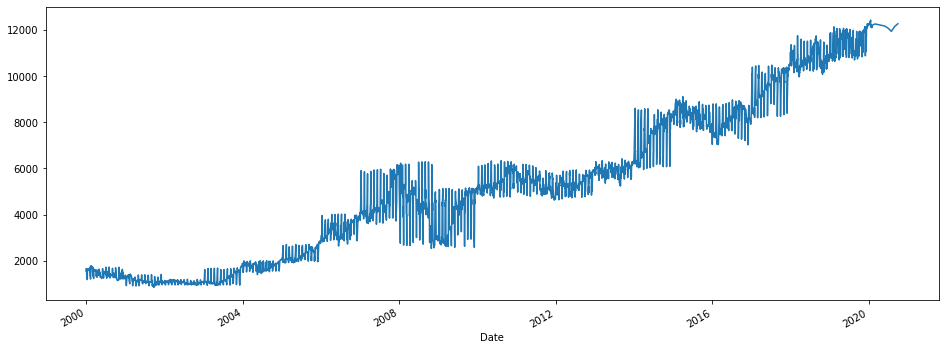

In [ ]:
df['Open'].plot(figsize=(16, 6))

In [ ]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2000-03-01,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN
2000-06-01,NaN,NaN,NaN,NaN,NaN
2000-07-01,NaN,NaN,NaN,NaN,NaN
2000-10-01,NaN,NaN,NaN,NaN,NaN
2000-11-01,1596.057143,1634.228571,1569.685714,1609.007143,4.657466e+07
2000-12-01,1608.935714,1639.750000,1582.478571,1613.664286,4.843276e+07
2000-01-13,1613.714286,1643.921429,1585.228571,1611.192857,4.928284e+07


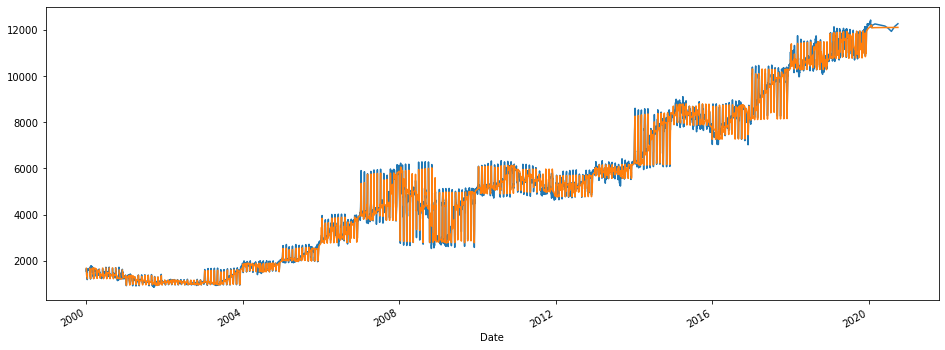

In [ ]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

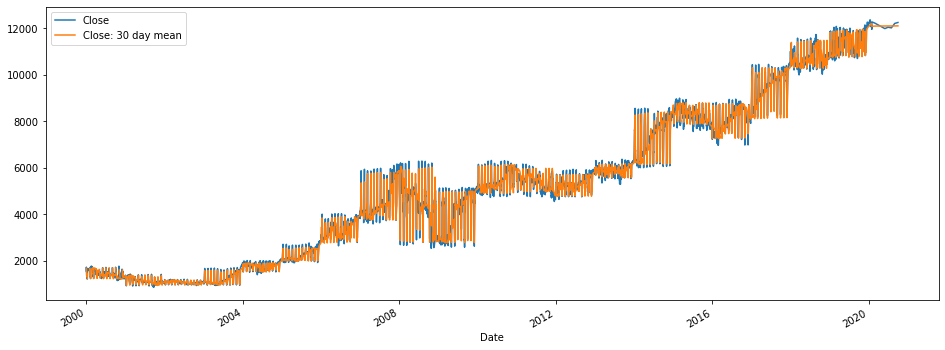

In [ ]:
df['Close: 30 day mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 day mean']].plot(figsize=(16,6))

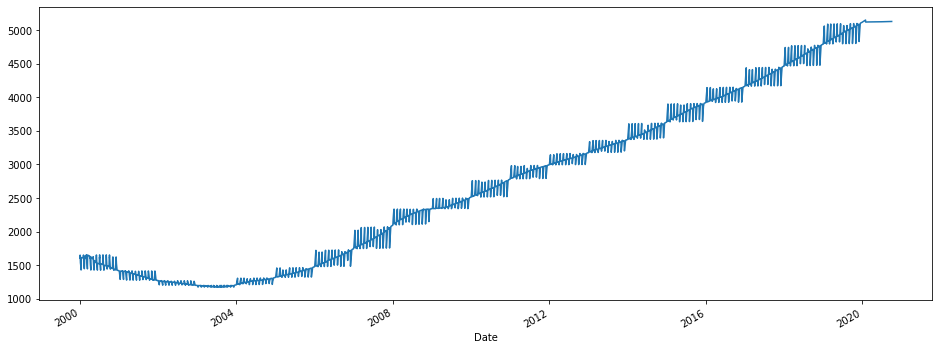

In [ ]:
df['Close'].expanding(min_periods = 1).mean().plot(figsize=(16,6))

In [ ]:
training_set = df['Open']
training_set = pd.DataFrame(training_set)

In [ ]:
df.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 day mean     True
dtype: bool

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []
for i in range(60, 4997):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initializing RNN
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
155/155 [==============================] - 26s 119ms/step - loss: 0.0092
Epoch 2/100
155/155 [==============================] - 18s 119ms/step - loss: 0.0025
Epoch 3/100
155/155 [==============================] - 18s 118ms/step - loss: 0.0022
Epoch 4/100
155/155 [==============================] - 18s 118ms/step - loss: 0.0021
Epoch 5/100
155/155 [==============================] - 18s 118ms/step - loss: 0.0018
Epoch 6/100
155/155 [==============================] - 19s 119ms/step - loss: 0.0017
Epoch 7/100
155/155 [==============================] - 19s 121ms/step - loss: 0.0016
Epoch 8/100
155/155 [==============================] - 19s 120ms/step - loss: 0.0015
Epoch 9/100
155/155 [==============================] - 19s 120ms/step - loss: 0.0016
Epoch 10/100
155/155 [==============================] - 19s 119ms/step - loss: 0.0014
Epoch 11/100
155/155 [==============================] - 19s 120ms/step - loss: 0.0013
Epoch 12/100
155/155 [==============================] - 18s 119

In [ ]:
uploaded = files.upload()

Saving Nifty_50_Test.csv to Nifty_50_Test (1).csv


In [ ]:
df_test = pd.read_csv('Nifty_50_Test.csv', index_col="Date", parse_dates=True)

In [ ]:
real_stock_price = df_test.iloc[:, 1:2].values

In [ ]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,11939.00,12017.35,11633.30,11661.85,537634767
2020-03-02,11627.45,11749.85,11614.50,11707.90,669815788
2020-04-02,11786.25,11986.15,11783.40,11979.65,560430291
2020-05-02,12005.85,12098.15,11953.35,12089.15,758032580
2020-06-02,12120.00,12160.60,12084.65,12137.95,565116236


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356 entries, 2020-01-02 to 2021-07-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    356 non-null    float64
 1   High    356 non-null    float64
 2   Low     356 non-null    float64
 3   Close   356 non-null    float64
 4   Volume  356 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.7 KB


In [ ]:
df_test["Volume"] = df_test["Volume"].astype(float)

In [ ]:
test_set = df_test['Open']
test_set = pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356 entries, 2020-01-02 to 2021-07-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    356 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [ ]:
df_total = pd.concat((df['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 356):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       296 non-null    float32
dtypes: float32(1)
memory usage: 1.3 KB


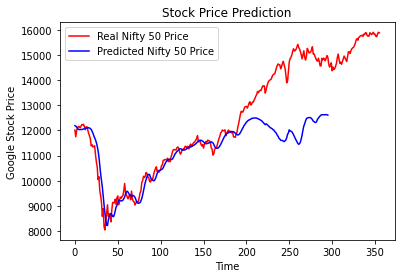

In [ ]:
plt.plot(real_stock_price, color="red", label="Real Nifty 50 Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Nifty 50 Price")
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()